# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [ ]:
print("Для того чтобы рандомные функции выдавали одни и те же результаты вне зависимости от количества запусков")

Для того чтобы рандомные функции выдавали одни и те же результаты вне зависимости от количества запусков


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [ ]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [ ]:
# your code here
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [ ]:
# your code here
df_test.head(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [ ]:
df_test.tail(5)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


In [ ]:
pd.concat([df_test.head(5), df_test.tail(5)])

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [ ]:
# your code here
df_train.describe()

,year,selling_price,km_driven,seats
count,6999.000000,6.999000e+03,6.999000e+03,6797.000000
mean,2013.818403,6.395152e+05,6.958462e+04,5.419008
std,4.053095,8.089419e+05,5.772400e+04,0.965767
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.700000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [ ]:
df_train.describe(include = 'object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [ ]:
df_test.describe()

,year,selling_price,km_driven,seats
count,1000.000000,1.000000e+03,1000.000000,981.000000
mean,2013.681000,6.179010e+05,71393.341000,5.410805
std,4.012149,7.585539e+05,48486.218662,0.919985
min,1995.000000,3.100000e+04,1303.000000,4.000000
25%,2011.000000,2.500000e+05,37000.000000,5.000000
50%,2014.000000,4.349990e+05,61500.000000,5.000000
75%,2017.000000,6.700000e+05,100000.000000,5.000000
max,2020.000000,6.000000e+06,375000.000000,9.000000


In [ ]:
df_test.describe(include = 'object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,1000,1000,1000,1000,1000,981,981,981,981
unique,621,4,3,2,5,237,88,182,226
top,Maruti Alto 800 LXI,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm
freq,15,534,837,877,623,23,116,43,57


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [ ]:
# your code here
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

In [ ]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

Пропуски есть в колонках mileage, engine, max_power, torque, seats

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [ ]:
# your code here
features = [i for i in df_train.columns if i != 'selling_price']
df_train.duplicated(subset = features).sum()

1159

Всего в трейне 1159 дупликатов

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [ ]:
# your code here
df_train[df_train.duplicated(subset = features)]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
254,Hyundai Grand i10 Sportz,2017,450000,35000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,82 bhp,114Nm@ 4000rpm,5.0
258,Maruti Swift VXI,2012,330000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
268,Maruti Swift Dzire VXI,2014,400000,70000,Petrol,Individual,Manual,Second Owner,19.1 kmpl,1197 CC,85.8 bhp,114Nm@ 4000rpm,5.0
324,Jaguar XE 2016-2019 2.0L Diesel Prestige,2017,2625000,9000,Diesel,Dealer,Automatic,First Owner,13.6 kmpl,1999 CC,177 bhp,430Nm@ 1750-2500rpm,5.0
325,Lexus ES 300h,2019,5150000,20000,Petrol,Dealer,Automatic,First Owner,22.37 kmpl,2487 CC,214.56 bhp,202Nm@ 3600-5200rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6947,Chevrolet Spark 1.0 LS,2010,140000,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6984,Ford Freestyle Titanium Plus Diesel BSIV,2018,746000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0
6989,Maruti Swift Dzire VDI,2015,625000,50000,Diesel,Individual,Manual,First Owner,26.59 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
6997,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57 kmpl,1396 CC,70 bhp,140Nm@ 1800-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [ ]:
# your code here
df_train = df_train.drop_duplicates(subset = features, keep='first')

In [ ]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [ ]:
# your code here
df_train = df_train.reset_index(drop=True)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [ ]:
# your code here
def delete_ed_izm(x):
  if pd.isnull(x):
    return x
  else:
    try:
      x = float(x.split()[0])
    except ValueError:
      x = np.NaN
    return x

for i in ['mileage',	'engine',	'max_power']:
  df_train[i] = df_train[i].apply(delete_ed_izm)
  df_test[i] = df_test[i].apply(delete_ed_izm)
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,"24@ 1,900-2,750(kgm@ rpm)",5.0


In [ ]:
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0


In [ ]:
import re
def torque_change(x):
  if pd.isnull(x):
    return x

  x = x.lower()
  if '(' in x:
    tailed = x[x.index('(')+1:].split('@')[0]
    x = x[:x.index('(')]
  if '/' in x:
    x = x.split('/')[0]
    tailed = 'nm'
  if '@' in x:
    x = x.split('@')[0]

  try:
    x = float(x)
  except ValueError:
    pass

  if type(x) == str:
    x = re.sub(r'\s+', '', x)

    match_nm = re.search(r'(\d+)([^\S\n\t]?)nm', x)
    match_kg = re.search(r'(\d+)([^\S\n\t]?)kgm', x)

    if match_kg:
      return float(match_kg.group(1))*9.80665
    elif match_nm:
      return float(match_nm.group(1))
    else:
      if tailed == 'kgm':
        return float(x)*9.80665
      else:
        return float(x)
  else:
    return x

# torque_change('260Nm@ 1500-2750rpm')
torque_change('110(11.2)@ 4800')

110.0

In [ ]:
def max_torque(x):
  if pd.isnull(x):
    return x
  x = x.lower()
  if '@' in x:
    x = x.split('@')[1]
  if '(' in x:
    tailed = x[x.index('(')+1:].split('@')[0]
    x = x[:x.index('(')]

  if '+/-' in x:
    x = re.sub(r'[a-zA-Z]', '', x.replace(',', '').strip())
    x = x.split("+/-")
    x = float(x[0]) + float(x[1])
  elif '/' in x:
    x = x.split('/')[1]

  if type(x) == str:
    x = re.sub(r'\s+', '', x)

    match_rpm = re.search(r'(\d+)([^\S\n\t]?)rpm', x)
    match_kg = re.search(r'(\d+)([^\S\n\t]?)kgm', x)

    if match_rpm:
      return float(match_rpm.group(1).replace(',', ''))
    else:
      if '-' in x:
        return float(x.split('-')[1].replace(',', ''))
      else:
        try:
          x = float(x.replace(',', ''))
        except ValueError:
          x = np.nan
        return x
  else:
    return x

# max_torque('380Nm(38.7kgm)@ 2500rpm')
max_torque('250 Nm at 2750 rpm')

2750.0

In [ ]:
df_train['max_torque_rpm'] = df_train['torque'].apply(max_torque)
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0,2500.0


In [ ]:
df_train['torque'] = df_train['torque'].apply(torque_change)
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190.0,5.0,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250.0,5.0,2500.0


In [ ]:
df_test['max_torque_rpm'] = df_test['torque'].apply(max_torque)
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260 Nm at 1800-2200 rpm,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260Nm@ 1500-2750rpm,5.0,2750.0


In [ ]:
df_test['torque'] = df_test['torque'].apply(torque_change)
df_test.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0,2498.0,112.0,260.0,7.0,2200.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5,1497.0,108.5,260.0,5.0,2750.0


(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [ ]:
# your code here
dict_of_medians = {}

for i in ['mileage', 'engine', 'max_power', 'torque', 'seats', 'max_torque_rpm']:
  dict_of_medians[i] = np.mean(df_train[i])
  df_train[i] = df_train[i].fillna(dict_of_medians[i])
  df_test[i] = df_test[i].fillna(dict_of_medians[i])

In [ ]:
df_train.isna().sum().sum()

0

In [ ]:
df_test.isna().sum().sum()

0


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [ ]:
print("потому что seats - фиксированное число, признак машины ()")

потому что seats - фиксированное число, признак машины ()


In [ ]:
# your code here
df_train.seats = df_train.seats.astype(int)
df_train.engine = df_train.engine.astype(int)

df_test.seats = df_test.seats.astype(int)
df_test.engine = df_test.engine.astype(int)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            5840 non-null   object 
 1   year            5840 non-null   int64  
 2   selling_price   5840 non-null   int64  
 3   km_driven       5840 non-null   int64  
 4   fuel            5840 non-null   object 
 5   seller_type     5840 non-null   object 
 6   transmission    5840 non-null   object 
 7   owner           5840 non-null   object 
 8   mileage         5840 non-null   float64
 9   engine          5840 non-null   int64  
 10  max_power       5840 non-null   float64
 11  torque          5840 non-null   float64
 12  seats           5840 non-null   int64  
 13  max_torque_rpm  5840 non-null   float64
dtypes: float64(4), int64(5), object(5)
memory usage: 638.9+ KB


## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

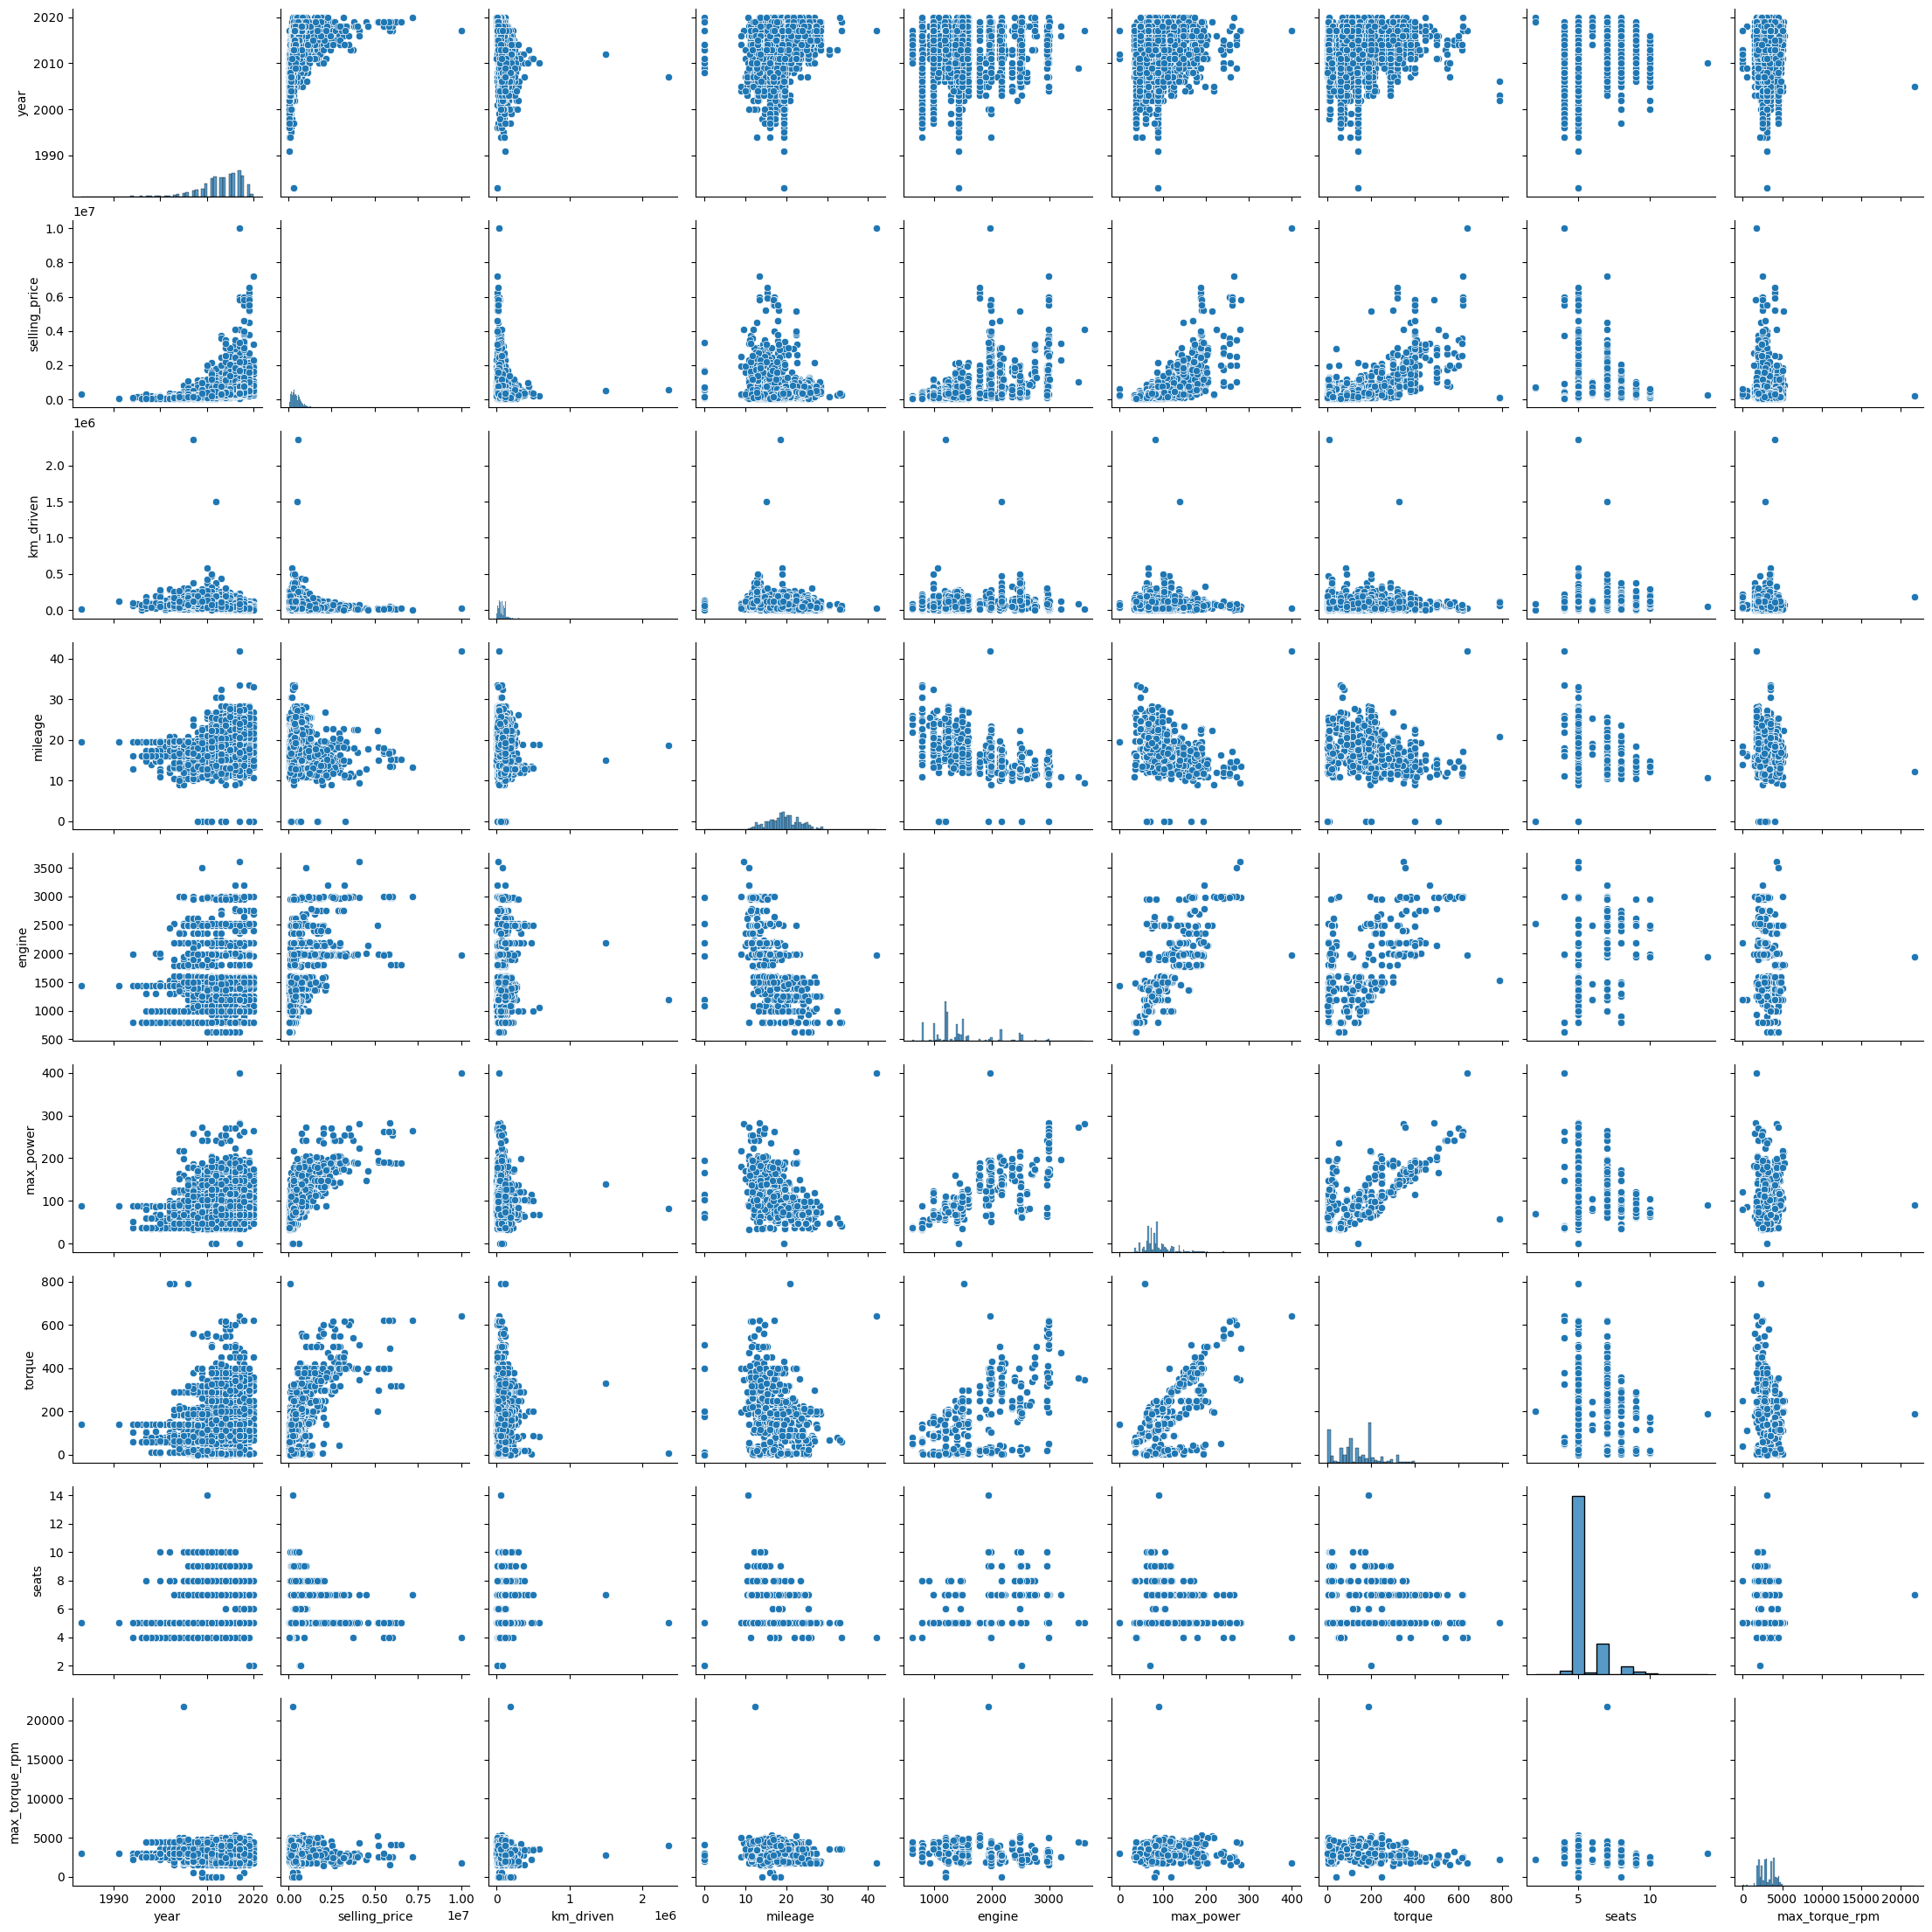

In [ ]:
# your code here

sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

1. Есть некоторая зависимость, что дорогие машины скорее всего новее по year, но дешевые машины могут быть произведены в любом году
2. Есть пара экземпляров, которая демонстрирует, что чем больше проехано км, тем дешевле машина, но машины с маленьким пробегом могут стоить сколько угодно
3. Аналогичные выводы моожно сделать и в столбцах torque, engine - чем ниже показатель, тем дешевле машины, машины с более высокими показателями могут быть любой цены
4. Больше всего с целевой переменнной коррелирует max power


Итого: напрашивается вполне логичный вывод, чем новее и круче по показателям машина, тем выше ее цена (но есть исключения, невозможно так достоверно утверждать на попарных графиках)

Признаки которые коррелируют (данные более менее похожи на прямую y = x)


*   torque - max_power
*   engine - max_power
*   torque - engine


Признаки которые антикоррелируют (данные более менее похожи на обратную прямую y = -x)
* engine - mileage

Признаки которые не коррелируют (данные просто лежат в виде облака точек)
* все не перечисленные выше


P.S. для feature engineering заметила эту связь с целевой перменной:

Коррелируют по нелинейной зависимости (данные более менее похожи на кривую $y = x^{2}$)
* year - selling_price
* km_driven - selling_price

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

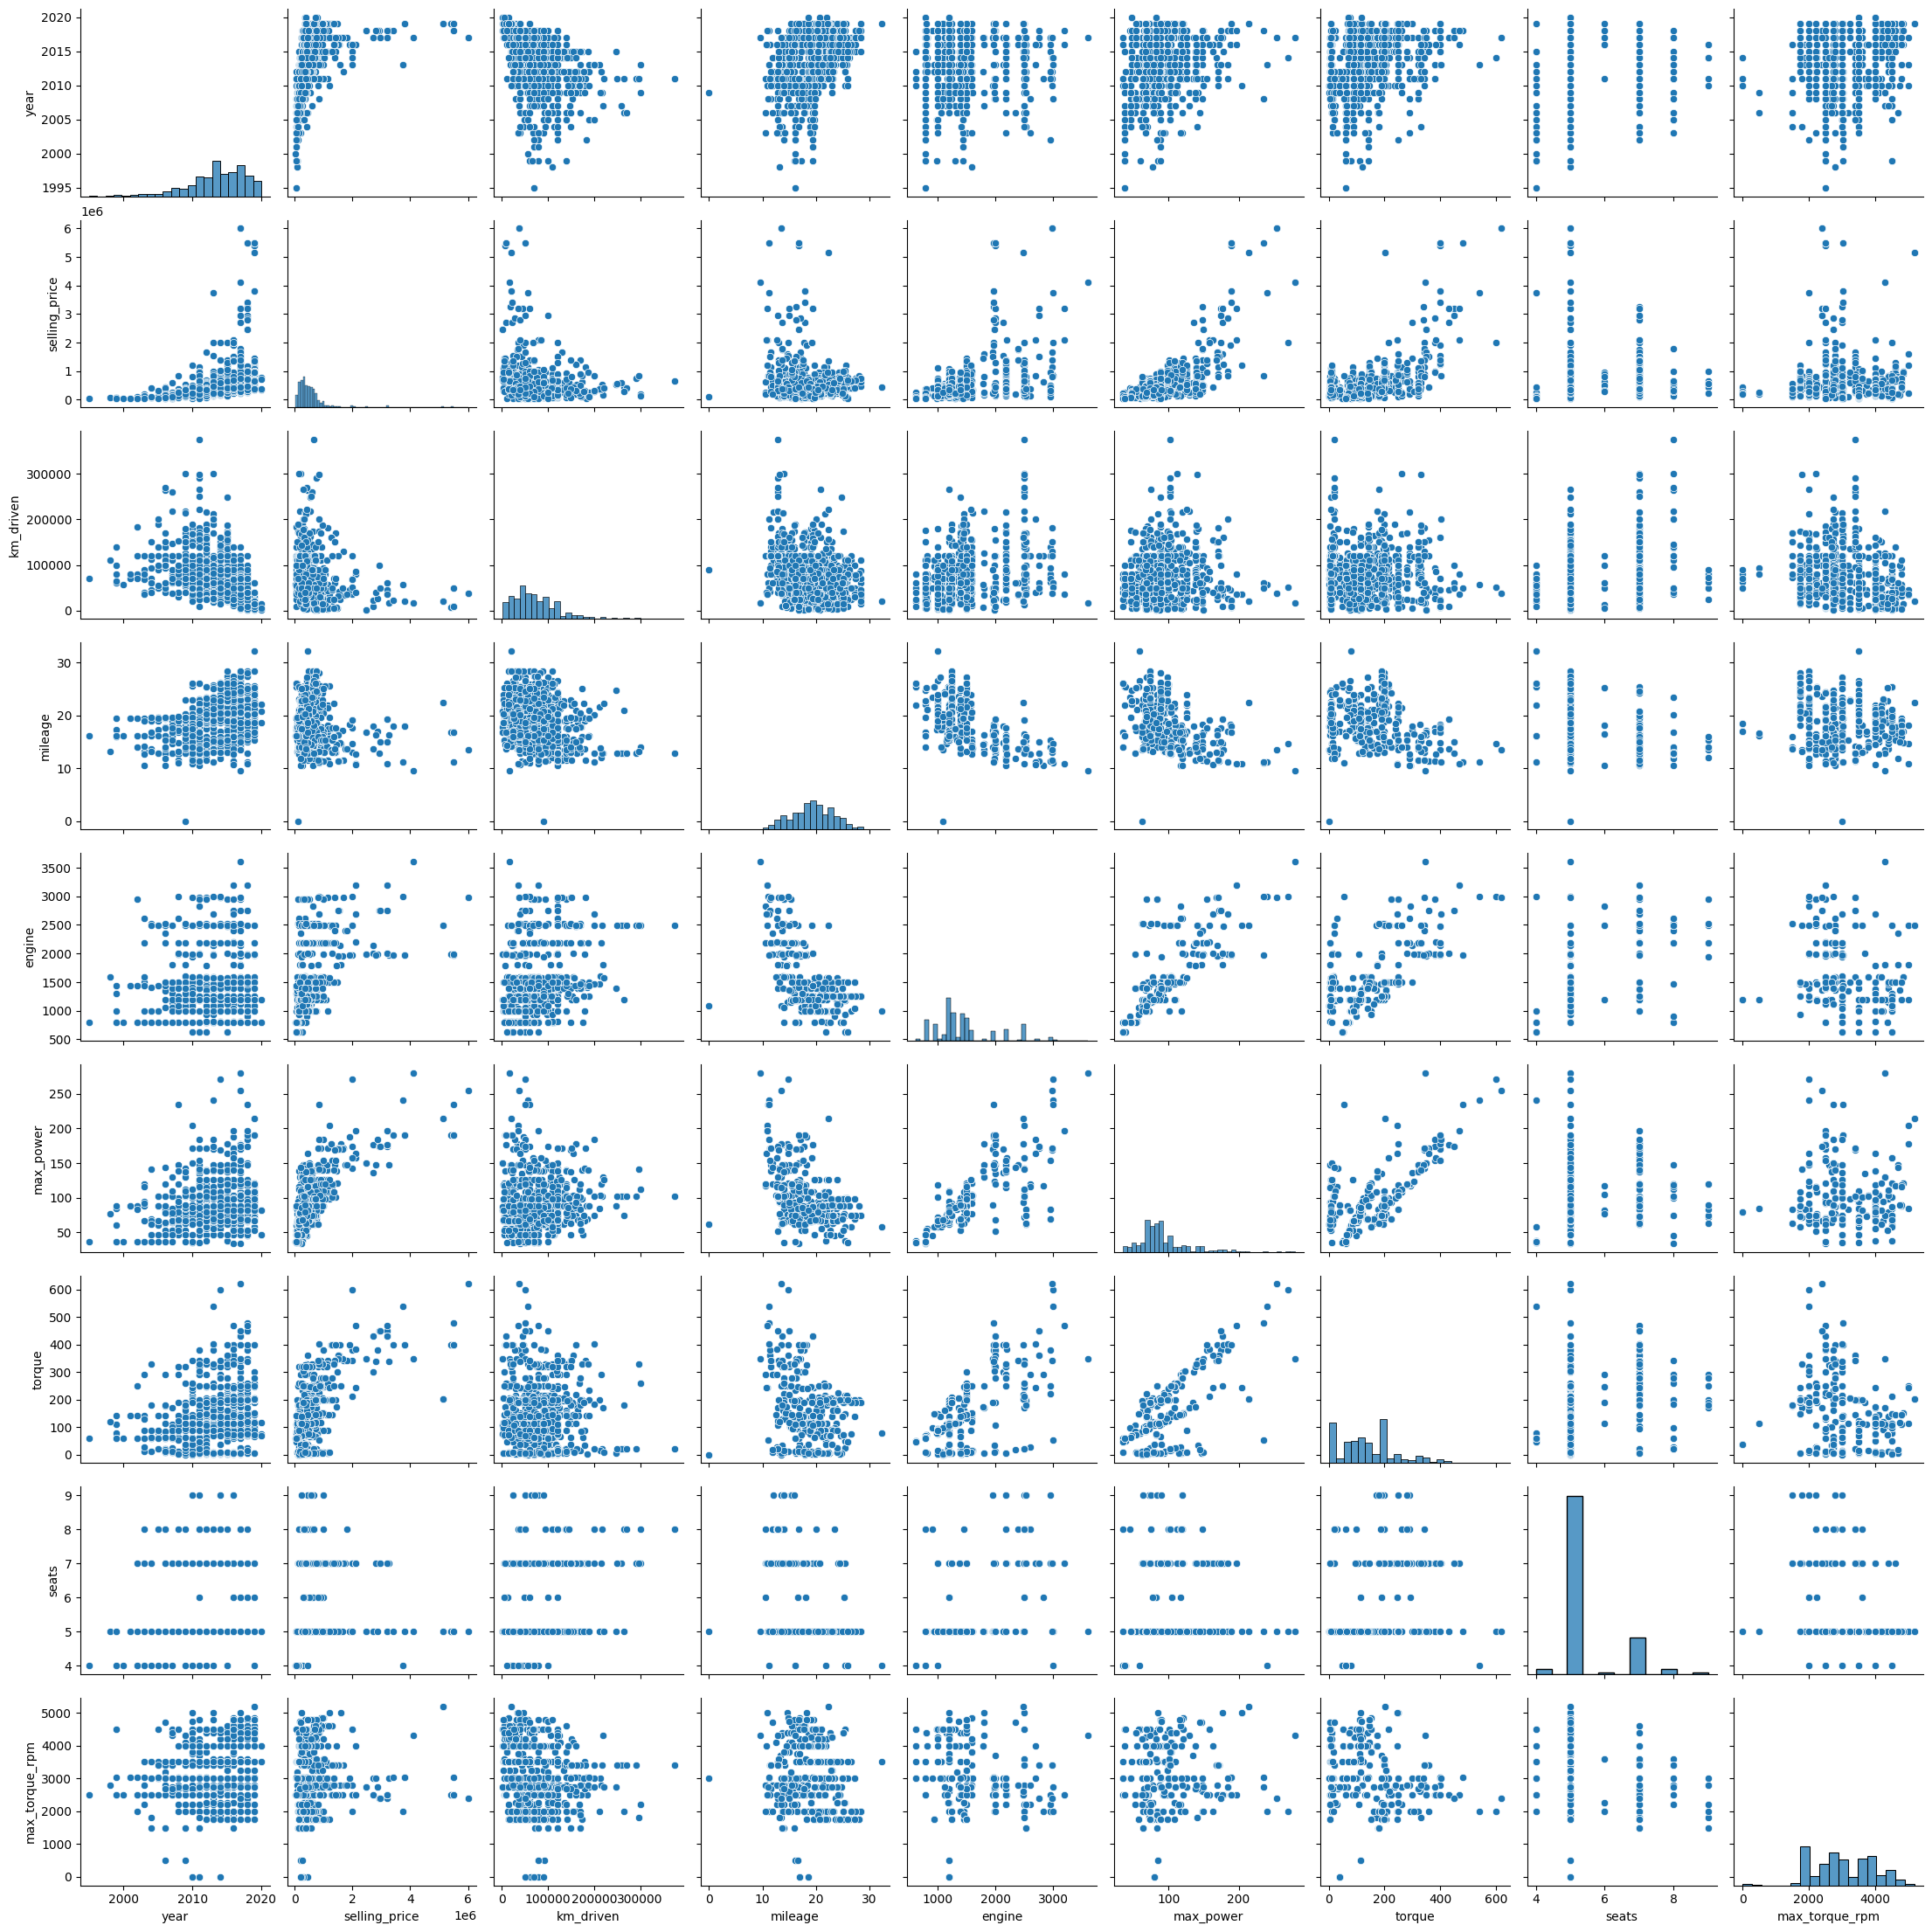

In [ ]:
# your code here
sns.pairplot(df_test)
plt.show()

Совокупности оказались похожими

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

<ipython-input-34-62b354a1384e>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df_train.corr()


<Axes: >

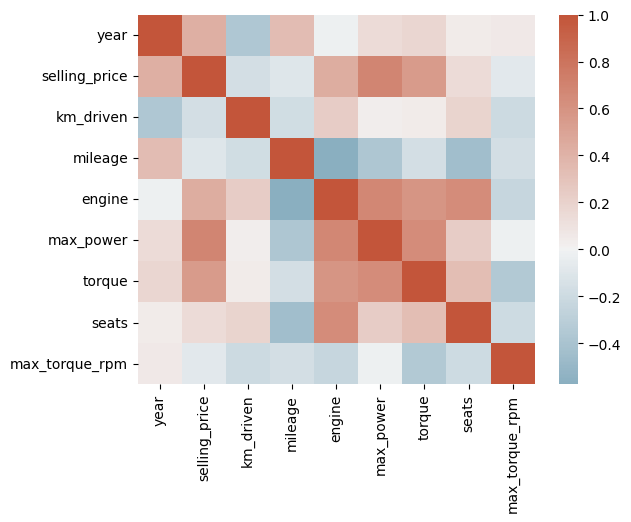

In [ ]:
# your code here
cmap = sns.diverging_palette(230, 20, as_cmap=True)
corr = df_train.corr()
sns.heatmap(corr, cmap=cmap, center=0,)

In [ ]:
corr

,year,selling_price,km_driven,mileage,engine,max_power,torque,seats,max_torque_rpm
year,1.000000,0.427279,-0.368966,0.340579,-0.015696,0.147368,0.181396,0.041178,0.057359
selling_price,0.427279,1.000000,-0.164828,-0.105048,0.441884,0.689743,0.545016,0.149953,-0.079440
km_driven,-0.368966,-0.164828,1.000000,-0.181941,0.233853,0.026445,0.043761,0.192328,-0.202317
mileage,0.340579,-0.105048,-0.181941,1.000000,-0.574404,-0.373803,-0.164018,-0.451279,-0.165654
engine,-0.015696,0.441884,0.233853,-0.574404,1.000000,0.680178,0.582758,0.648335,-0.234138
max_power,0.147368,0.689743,0.026445,-0.373803,0.680178,1.000000,0.637622,0.241658,-0.017545
torque,0.181396,0.545016,0.043761,-0.164018,0.582758,0.637622,1.000000,0.334820,-0.348527
seats,0.041178,0.149953,0.192328,-0.451279,0.648335,0.241658,0.334820,1.000000,-0.197049
max_torque_rpm,0.057359,-0.079440,-0.202317,-0.165654,-0.234138,-0.017545,-0.348527,-0.197049,1.000000


Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Наименее скоррелированы: engine - year

Сильная положительная зависимость между: max_power - selling_price (хоть selling price это не признак, думаю это стоит отметить), max_power - engine, max_power - torque, seats - engine (+ torque - engine вполне можно сюда отнести)

Сложно сказать, можно ли так утверждать, смотря что вкладывать в значение "скорее всего", корреляция всего -0.37, это слабая обратная зависимость, о сильной зависимости речи тут идти не может

По моему восприятию фразы "скорее всего" - это корреляция по модулю больше 0.8, так что я бы не стала так утверждать

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

<Axes: xlabel='max_power', ylabel='engine'>

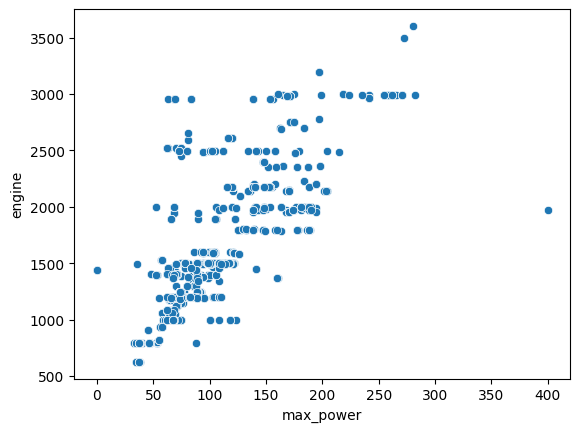

In [ ]:
# your code here
sns.scatterplot(df_train, x = 'max_power', y = 'engine')

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

<Axes: xlabel='engine', ylabel='mileage'>

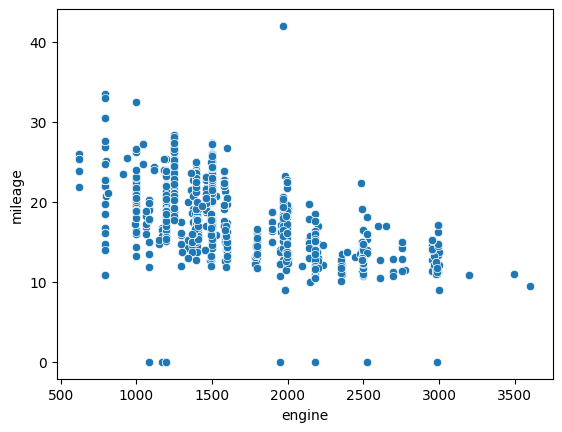

In [ ]:
# your code here
sns.scatterplot(df_train, x = 'engine', y = 'mileage')

Наблюдается обратная зависимость между объемом двигателя (engine) и расход топлива (mileage), что логично, тк в японском и не только понимании расход это не кол-во литров на 100 км,а кол-во миль на литр топлива, поэтому чем больше величина (mileage) тем меньше расход в моем.

<Axes: xlabel='engine', ylabel='torque'>

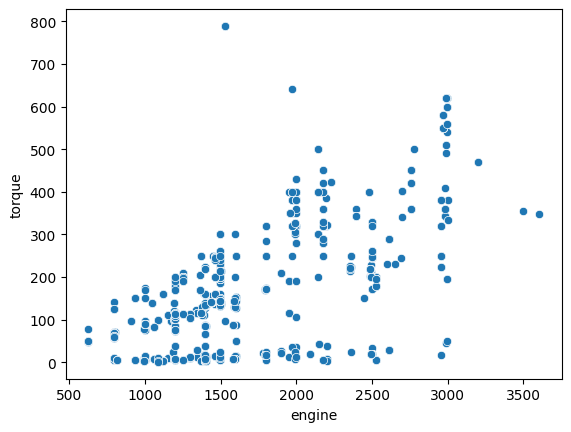

In [ ]:
# your code here
sns.scatterplot(df_train, x = 'engine', y = 'torque')

Наблюдается прямая линейная корреляция объема двигателя (engine) и крутящего момента (torque). Это логично , так как чем больше объем двигателя, тем больше его мощность и тем большую мощность он может передать на колеса. Следственно чем больше объем, тем больше крутящий момент

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [ ]:
y_train = df_train['selling_price'] # your code here
X_train = df_train.drop(columns = ['selling_price', 'name',	'fuel',	'seller_type',	'transmission',	'owner']) # your code here
feature_cols = X_train.columns

In [ ]:
X_train.shape

(5840, 8)

In [ ]:
# assert X_train.shape == (5840, 6)

In [ ]:
y_test = df_test['selling_price']# your code here
X_test = df_test.drop(columns = ['selling_price', 'name',	'fuel',	'seller_type',	'transmission',	'owner']) # your code here

In [ ]:
X_test.shape

(1000, 8)

In [ ]:
# assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

# your code here
L_reg_1 = LinearRegression()
L_reg_1.fit(X_train, y_train)
pred_num_train = L_reg_1.predict(X_train)
pred_num_test = L_reg_1.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

R2 train = 0.60, R2 test = 0.61,MSE train = 113224357438.97, MSE test  = 225736280006.22


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [ ]:
from sklearn.preprocessing import StandardScaler

# your code here
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

L_reg_1 = LinearRegression()
L_reg_1.fit(X_train, y_train)
pred_num_train = L_reg_1.predict(X_train)
pred_num_test = L_reg_1.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

R2 train = 0.60, R2 test = 0.61,MSE train = 113224357438.97, MSE test  = 225736280006.22


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [ ]:
# your code here
print(L_reg_1.coef_)
print(L_reg_1.intercept_)

print(f'Самым информативным оказался {feature_cols[L_reg_1.coef_.argmax()]}')

[164626.83876406 -45783.50886991  -9856.51374531  19504.27268164
 300653.48887884  56807.24850946 -34340.5652809  -39996.00072799]
522960.09109588666
Самым информативным оказался max_power


(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [ ]:
from sklearn.linear_model import Lasso

# your code here
lasso = Lasso()
lasso.fit(X_train, y_train)
pred_num_train = lasso.predict(X_train)
pred_num_test = lasso.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

print(lasso.coef_)
print(lasso.intercept_)

R2 train = 0.60, R2 test = 0.61,MSE train = 113224357452.42, MSE test  = 225737027097.41
[164624.66907578 -45782.58279385  -9853.38966916  19501.97836357
 300654.72337615  56807.02754671 -34336.58550054 -39993.97972608]
522960.09109588666


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [ ]:
# your code here
print('Не занулила, так как alpha=0.1 маловато для наших данных')

Не занулила, так как alpha=0.1 маловато для наших данных


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [ ]:
from sklearn.model_selection import GridSearchCV

# your code here
grd = GridSearchCV(lasso, {'alpha':np.arange(1, 10101, 100)}, cv = 10)
grd.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': array([    1,   101,   201,   301,   401,   501,   601,   701,   801,
         901,  1001,  1101,  1201,  1301,  1401,  1501,  1601,  1701,
        1801,  1901,  2001,  2101,  2201,  2301,  2401,  2501,  2601,
        2701,  2801,  2901,  3001,  3101,  3201,  3301,  3401,  3501,
        3601,  3701,  3801,  3901,  4001,  4101,  4201,  4301,  4401,
        4501,  4601,  4701,  4801,  4901,  5001,  5101,  5201,  5301,
        5401,  5501,  5601,  5701,  5801,  5901,  6001,  6101,  6201,
        6301,  6401,  6501,  6601,  6701,  6801,  6901,  7001,  7101,
        7201,  7301,  7401,  7501,  7601,  7701,  7801,  7901,  8001,
        8101,  8201,  8301,  8401,  8501,  8601,  8701,  8801,  8901,
        9001,  9101,  9201,  9301,  9401,  9501,  9601,  9701,  9801,
        9901, 10001])})

In [ ]:
# print(f'R2: {grd.best_score_:0.3f}')
print(f'Best param: {grd.best_params_}')

Best param: {'alpha': 10001}


In [ ]:
grd.cv_results_

{'mean_fit_time': array([0.00477068, 0.00469716, 0.00498357, 0.00580668, 0.00618575,
        0.00435102, 0.0036586 , 0.00345061, 0.00422146, 0.0035553 ,
        0.00632384, 0.00486751, 0.00351839, 0.00326164, 0.00412798,
        0.00422618, 0.00404632, 0.00411456, 0.00543344, 0.00422552,
        0.00492857, 0.00451226, 0.00471694, 0.00433743, 0.00496225,
        0.00527868, 0.00359378, 0.00397477, 0.00438511, 0.00441575,
        0.00549212, 0.00706751, 0.00470033, 0.00518923, 0.00384505,
        0.00403476, 0.00390303, 0.00413973, 0.00397682, 0.00410228,
        0.00532477, 0.00434003, 0.00449514, 0.00560043, 0.00355034,
        0.00317574, 0.00376289, 0.00407619, 0.00454218, 0.0040863 ,
        0.00417883, 0.00556817, 0.00447485, 0.0048398 , 0.00418632,
        0.00500734, 0.00526798, 0.00515912, 0.00509555, 0.00542481,
        0.00438585, 0.00448878, 0.00199821, 0.00185666, 0.00182002,
        0.00181918, 0.00163331, 0.00178356, 0.00182104, 0.00165198,
        0.00162795, 0.00159233,

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

101 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [ ]:
# your code here
lasso = Lasso(alpha = 10001)
lasso.fit(X_train, y_train)
pred_num_train = lasso.predict(X_train)
pred_num_test = lasso.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

print(lasso.coef_)
print(lasso.intercept_)

R2 train = 0.60, R2 test = 0.59,MSE train = 113981830389.83, MSE test  = 233575749822.33
[152185.5136693  -36507.55783207      0.              0.
 303342.49294828  55566.91484802  -5816.95020087 -25103.16399612]
522960.09109588695


коэффициент: 10001

да, занулились 3 и 4 признаки

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [ ]:
from sklearn.linear_model import ElasticNet

# your code here
# your code here
elastic = ElasticNet()
elastic.fit(X_train, y_train)
pred_num_train = lasso.predict(X_train)
pred_num_test = lasso.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

# print(elastic.coef_)
# print(elastic.intercept_)
grd = GridSearchCV(elastic, {'alpha':np.arange(1, 10, 1), 'l1_ratio':np.arange(0, 1, 0.1)}, cv = 10)
grd.fit(X_train, y_train)

R2 train = 0.60, R2 test = 0.59,MSE train = 113981830389.83, MSE test  = 233575749822.33


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.850e+14, tolerance: 1.247e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.807e+14, tolerance: 1.564e+11 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_mode

GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'l1_ratio': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])})

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [ ]:
# your code here
print(f'Best param: {grd.best_params_}')

Best param: {'alpha': 1, 'l1_ratio': 0.9}


In [ ]:
elastic = ElasticNet(alpha = 1, l1_ratio = 0.9)
elastic.fit(X_train, y_train)
pred_num_train = lasso.predict(X_train)
pred_num_test = lasso.predict(X_test)
print(f'''R2 train = {r2_score(y_train, pred_num_train):0.2f}, R2 test = {r2_score(y_test, pred_num_test):0.2f},\
MSE train = {MSE(y_train, pred_num_train):0.2f}, MSE test  = {MSE(y_test, pred_num_test):0.2f}''')

R2 train = 0.60, R2 test = 0.59,MSE train = 113981830389.83, MSE test  = 233575749822.33


Коэф. регуляризации равен 1, и коэф. смешивания 0.9(надеюсь верно перевела с английского)

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [ ]:
df_train.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0,5,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0,5,2500.0


In [ ]:
# your code here
X_train_cat = df_train.drop(columns = {'name', 'selling_price'})
X_train_cat.shape

(5840, 12)

In [ ]:
# assert X_train_cat.shape == (5840, 10)

In [ ]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [ ]:
from sklearn.preprocessing import OneHotEncoder # или можно использовать get_dummies из библиотеки pandas

# your code here
columns_to_encode = ['fuel', 'seller_type', 'transmission', 'owner', 'seats']
encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore').fit(X_train_cat[columns_to_encode])

train_encoded = encoder.transform(X_train_cat[columns_to_encode])
X_train_cat = pd.concat([X_train_cat, pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out(columns_to_encode))], axis=1)
X_train_cat

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,Diesel,Individual,Manual,First Owner,23.40,1248,74.00,190.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,250.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,Diesel,Individual,Manual,First Owner,23.00,1396,90.00,39.2266,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,Petrol,Individual,Manual,First Owner,16.10,1298,88.20,11.5000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,Petrol,Individual,Manual,First Owner,20.14,1197,81.86,75.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,Petrol,Individual,Manual,First Owner,17.92,1086,62.10,1.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5836,2013,50000,Petrol,Individual,Manual,Second Owner,18.90,998,67.10,90.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5837,2013,110000,Petrol,Individual,Manual,First Owner,18.50,1197,82.85,7.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5838,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493,110.00,24.0000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train_cat = X_train_cat.drop(columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats'])
X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

Без категориальных

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
ridge = Ridge(alpha = 1)
ridge.fit(X_train, y_train)
print(f'R2: {r2_score(y_train, ridge.predict(X_train)):0.3f}')
# print(elastic.coef_)
# print(elastic.intercept_)
grd = GridSearchCV(ridge, {'alpha':np.arange(1, 100, 10)}, cv = 10, scoring='r2')
grd.fit(X_train, y_train)

R2: 0.605


GridSearchCV(cv=10, estimator=Ridge(alpha=1),
             param_grid={'alpha': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='r2')

In [ ]:
print(f'R2: {grd.best_score_:0.3f}')
print(f'Best param: {grd.best_params_}')

R2: 0.582
Best param: {'alpha': 91}


In [ ]:
ridge = Ridge(alpha = 91)
ridge.fit(X_train, y_train)
print(f'R2: {r2_score(y_train, ridge.predict(X_train)):0.3f}')

R2: 0.605


Без категоиальных качество регрессии не улучшилось

На категориальных уже

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

# your code here
ridge = Ridge()
ridge.fit(X_train_cat, y_train)
print(f'R2: {r2_score(y_train, ridge.predict(X_train_cat)):0.3f}')
# print(elastic.coef_)
# print(elastic.intercept_)
grd = GridSearchCV(ridge, {'alpha':np.arange(1, 100, 10)}, cv = 10, scoring='r2')
grd.fit(X_train_cat, y_train)

R2: 0.674


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91])},
             scoring='r2')

In [ ]:
print(f'R2: {grd.best_score_:0.3f}')
print(f'Best param: {grd.best_params_}')

R2: 0.630
Best param: {'alpha': 11}


In [ ]:
ridge = Ridge(alpha = 11)
ridge.fit(X_train_cat, y_train)
print(f'R2: {r2_score(y_train, ridge.predict(X_train_cat)):0.3f}')

R2: 0.661


Улучшить качество также не удалось, но качество стало лучше по сравнению с датасетом без категориальных переменных

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [ ]:
# your code here
X_train_cat.head(5)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,owner_Test Drive Car,owner_Third Owner,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14
0,2014,145500,23.40,1248,74.00,190.0000,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2014,120000,21.14,1498,103.52,250.0000,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2010,127000,23.00,1396,90.00,39.2266,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2007,120000,16.10,1298,88.20,11.5000,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017,45000,20.14,1197,81.86,75.0000,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


1. **Прислушаюсь к совету, добавлю квадрат года и квадрат пройденных километров**

In [ ]:
# Добавлю признаки: квадрат года,
X_train_cat['year_squared'] = X_train_cat['year']**2
X_train_cat['km_driven_squared'] = X_train_cat['km_driven']**2
X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year_squared,km_driven_squared
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,21170250000
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,14400000000


2. **По диаграммам из EDA я увидела выбросы в поле max_torque_rpm, кажется их немного**

<Axes: >

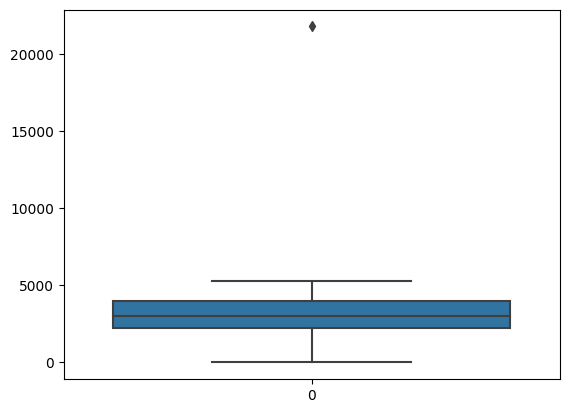

In [ ]:
sns.boxplot(data=X_train_cat['max_torque_rpm'])

Действительно, выброс всего один, его можно удалить

In [ ]:
index_del = X_train_cat[X_train_cat['max_torque_rpm'] == max(X_train_cat['max_torque_rpm'])].index
index_del

Int64Index([3936], dtype='int64')

In [ ]:
X_train_cat = X_train_cat[X_train_cat['max_torque_rpm'] != max(X_train_cat['max_torque_rpm'])]
X_train_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_4,seats_5,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year_squared,km_driven_squared
0,2014,145500,23.40,1248,74.00,190.0,2000.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,21170250000
1,2014,120000,21.14,1498,103.52,250.0,2500.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,4056196,14400000000


In [ ]:
X_train_cat.shape

(5839, 27)

In [ ]:
y_train = y_train.drop(index_del)
y_train.shape

(5839,)

3. **Также меня смутил автомобиль с 14 местами (уже какойто микроавтобус получается)**

In [ ]:
df_train[df_train['seats'] == max(df_train['seats'])]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
3330,Tata Winger Deluxe - Flat Roof (Non-AC),2010,235000,50000,Diesel,Individual,Manual,First Owner,10.71,1948,90.0,190.0,14,3000.0


Там действительно 14 мест, убирать его нельзя

4. **Отлогарифмирую столбцы torque и engine, так как у них совсем не около нормальное распределение**

In [ ]:
X_train_cat['torque_log'] = np.log(X_train_cat['torque'])
X_train_cat['engine_log'] = np.log(X_train_cat['engine'])
X_train_cat

<ipython-input-77-7edbd0e14533>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['torque_log'] = np.log(X_train_cat['torque'])
<ipython-input-77-7edbd0e14533>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train_cat['engine_log'] = np.log(X_train_cat['engine'])


,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year_squared,km_driven_squared,torque_log,engine_log
0,2014,145500,23.40,1248,74.00,190.0000,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4056196,21170250000,5.247024,7.129298
1,2014,120000,21.14,1498,103.52,250.0000,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4056196,14400000000,5.521461,7.311886
2,2010,127000,23.00,1396,90.00,39.2266,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4040100,16129000000,3.669355,7.241366
3,2007,120000,16.10,1298,88.20,11.5000,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4028049,14400000000,2.442347,7.168580
4,2017,45000,20.14,1197,81.86,75.0000,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4068289,2025000000,4.317488,7.087574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2008,191000,17.92,1086,62.10,1.0000,3000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4032064,36481000000,0.000000,6.990257
5836,2013,50000,18.90,998,67.10,90.0000,3500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4052169,2500000000,4.499810,6.905753
5837,2013,110000,18.50,1197,82.85,7.0000,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4052169,12100000000,1.945910,7.087574
5838,2007,119000,16.80,1493,110.00,24.0000,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4028049,14161000000,3.178054,7.308543


<Axes: xlabel='torque', ylabel='Count'>

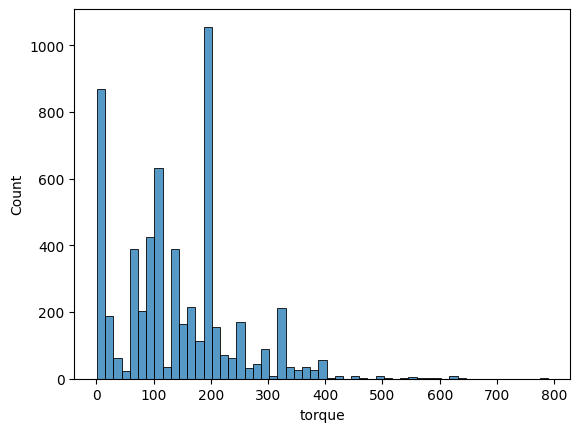

In [ ]:
sns.histplot(X_train_cat['torque'])

<Axes: xlabel='engine', ylabel='Count'>

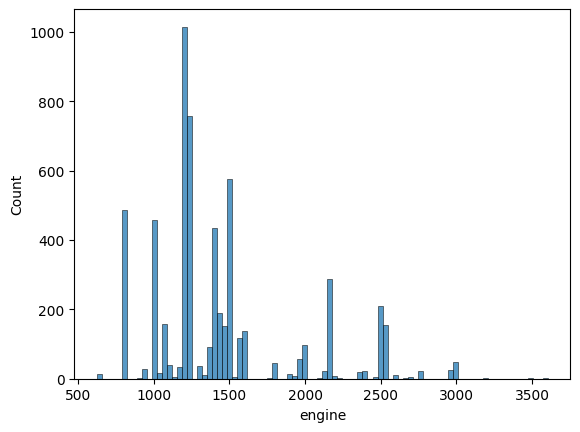

In [ ]:
sns.histplot(X_train_cat['engine'])

Не скажу что стало сильно лучше, но попробовать стоит

5. **Проверю выбросы в целевой переменнной**

<Axes: ylabel='selling_price'>

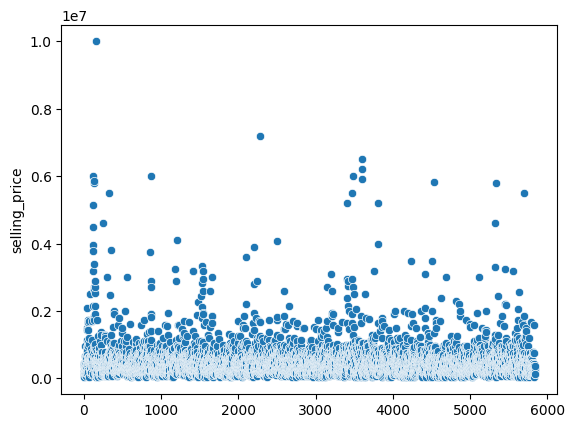

In [ ]:
sns.scatterplot(data = df_train['selling_price'])

<Axes: >

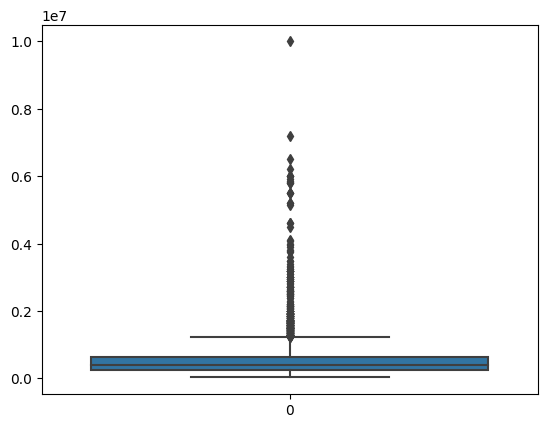

In [ ]:
sns.boxplot(data = df_train['selling_price'])

Выбросы определенно есть, посмотрю что это за машины (может они реально очень крутые и дорогие)

In [ ]:
q1=df_train['selling_price'].quantile(0.25)

q3=df_train['selling_price'].quantile(0.75)

IQR=q3-q1

outliers = df_train[((df_train['selling_price']<(q1-1.5*IQR)) | (df_train['selling_price']>(q3+1.5*IQR)))].sort_values(by = 'selling_price')
outliers

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats,max_torque_rpm
3151,Honda City i-VTEC CVT ZX,2019,1227000,5000,Petrol,Individual,Automatic,First Owner,18.00,1497,117.60,145.0,5,4600.0
4345,Hyundai Creta 1.6 CRDi SX,2018,1237000,46000,Diesel,Individual,Manual,First Owner,19.67,1582,126.20,9.0,5,2750.0
184,Tata Hexa XE,2019,1250000,15000,Diesel,Individual,Manual,First Owner,17.60,2179,147.94,320.0,7,3000.0
4831,Toyota Innova 2.5 VX (Diesel) 8 Seater,2015,1250000,90000,Diesel,Individual,Manual,First Owner,12.99,2494,100.60,200.0,8,3400.0
270,Honda City i-DTEC VX,2017,1250000,33000,Diesel,Individual,Manual,First Owner,25.60,1498,97.90,200.0,5,1750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,Mercedes-Benz S-Class S 350 CDI,2017,6000000,37000,Diesel,Dealer,Automatic,First Owner,13.50,2987,254.79,620.0,5,2400.0
3595,Audi A6 35 TFSI Matrix,2019,6223000,7800,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,320.0,5,4100.0
3597,Audi A6 35 TFSI Matrix,2019,6523000,23600,Petrol,Dealer,Automatic,Test Drive Car,15.26,1798,187.74,320.0,5,4100.0
2283,BMW X7 xDrive 30d DPE,2020,7200000,5000,Diesel,Individual,Automatic,First Owner,13.38,2993,265.00,620.0,7,2500.0


In [ ]:
outliers.value_counts('owner')

owner
First Owner       234
Second Owner       46
Test Drive Car      4
Third Owner         3
dtype: int64

Погуглив, понимаю что машины реально дорогие, крутые и новые (First owner преобладает), убирать их - портить объективность модели

In [ ]:
X_train_cat.head(5)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year_squared,km_driven_squared,torque_log,engine_log
0,2014,145500,23.40,1248,74.00,190.0000,2000.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4056196,21170250000,5.247024,7.129298
1,2014,120000,21.14,1498,103.52,250.0000,2500.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4056196,14400000000,5.521461,7.311886
2,2010,127000,23.00,1396,90.00,39.2266,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4040100,16129000000,3.669355,7.241366
3,2007,120000,16.10,1298,88.20,11.5000,4500.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4028049,14400000000,2.442347,7.168580
4,2017,45000,20.14,1197,81.86,75.0000,4000.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4068289,2025000000,4.317488,7.087574


In [ ]:
ridge = Ridge()
ridge.fit(X_train_cat, y_train)
print(f'R2: {r2_score(y_train, ridge.predict(X_train_cat)):0.3f}')

R2: 0.703


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=3.0014e-26): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
X_test_cat = df_test.drop(columns = {'name', 'selling_price'})

test_encoded = encoder.transform(X_test_cat[columns_to_encode])
X_test_cat = pd.concat([X_test_cat, pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out(columns_to_encode))], axis=1)

X_test_cat = X_test_cat.drop(columns = ['fuel', 'seller_type', 'transmission', 'owner', 'seats'])
X_test_cat['year_squared'] = X_test_cat['year']**2
X_test_cat['km_driven_squared'] = X_test_cat['km_driven']**2
X_test_cat['torque_log'] = np.log(X_test_cat['torque'])
X_test_cat['engine_log'] = np.log(X_test_cat['engine'])
X_test_cat.head(2)

,year,km_driven,mileage,engine,max_power,torque,max_torque_rpm,fuel_Diesel,fuel_LPG,fuel_Petrol,...,seats_6,seats_7,seats_8,seats_9,seats_10,seats_14,year_squared,km_driven_squared,torque_log,engine_log
0,2010,168000,14.0,2498,112.0,260.0,2200.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,4040100,28224000000,5.560682,7.823246
1,2017,25000,21.5,1497,108.5,260.0,2750.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4068289,625000000,5.560682,7.311218


In [ ]:
print(f'R2: {r2_score(y_test, ridge.predict(X_test_cat)):0.3f}')

R2: 0.673


In [ ]:
ridge.predict(X_test_cat)[0]

645074.2282469273

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [ ]:
def business_metrics(y_true, y_pred):
    # your code here
    metrics = abs((y_pred- y_true)/y_true) <=0.1
    return sum(metrics)/len(metrics)

# ridge = Ridge()
# ridge.fit(X_train_cat, y_train)
# print(f'R2: {r2_score(y_train, ridge.predict(X_train_cat)):0.3f}')
business_metrics(y_train, ridge.predict(X_train_cat))

0.2193868813152937

# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллекцией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

**Выгружу все веса модели, скелеры и средние значения для пропусков**

In [ ]:
import joblib

joblib.dump((dict_of_medians, scaler, encoder, ridge), 'ridge_model.pickle')

['ridge_model.pickle']

In [ ]:
dict_of_medians, scaler, encoder, ridge  = joblib.load('ridge_model.pickle')
dict_of_medians, scaler, encoder, ridge

({'mileage': 19.43284223558543,
  'engine': 1435.4181110718075,
  'max_power': 88.10307019094766,
  'torque': 141.9456403325668,
  'seats': 5.440749911567032,
  'max_torque_rpm': 3029.9837168141594},
 StandardScaler(),
 OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
               sparse_output=False),
 Ridge())

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link